**Value at Risk Calculation Using yfinance data**

**Prepared By:**
Rahul Joshi

1. Calculation of VaR using historical method:
(Assuming Porfolio Value = $1M)

In [170]:
import yfinance as yf
import math

def return_sorted(data):
    data['Return'] = (data['Close'] - data['Close'].shift(1))/data['Close'].shift(1)
    sorted_returns = data['Return'].dropna().sort_values()
    return sorted_returns

def VaR(sorted_returns, n, confidence_level):
    rank_position = n * (1 - confidence_level/100)
    # print(rank_position)
    return sorted_returns.iloc[math.ceil(rank_position)-1]

data = yf.download("TSLA", start='2023-01-01', end='2024-01-01')
data.to_csv('tsla.csv')
portfolio_value = 1000000
sorted_returns = return_sorted(data)
n = len(sorted_returns)

print(f"The 1-Day VaR at 95% Confidence Level for Portfolio Value ${portfolio_value:,} is: ${abs(VaR(sorted_returns, n, 95)*portfolio_value):,.2f}")
print(f"The 1-Day VaR at 99% Confidence Level for Portfolio Value ${portfolio_value:,} is: ${abs(VaR(sorted_returns, n, 99)*portfolio_value):,.2f}")
data.head()

[*********************100%***********************]  1 of 1 completed

The 1-Day VaR at 95% Confidence Level for Portfolio Value $1,000,000 is: $50,308.74
The 1-Day VaR at 99% Confidence Level for Portfolio Value $1,000,000 is: $93,003.10


Price,Close,High,Low,Open,Volume,Return
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800,NaN
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000,0.051249
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300,-0.029039
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100,0.024651
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000,0.059349


2. Calculation of VaR using Monte-Carlo method:
(Assuming Portfolio Value = $1M)

[*********************100%***********************]  1 of 1 completed

1-Day 95% Monte Carlo VaR using GBM: $-21,912.23
1-Day 99% Monte Carlo VaR using GBM: $-30,377.14



/tmp/ipykernel_81694/2745124369.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(prices.iloc[-1]) # latest price


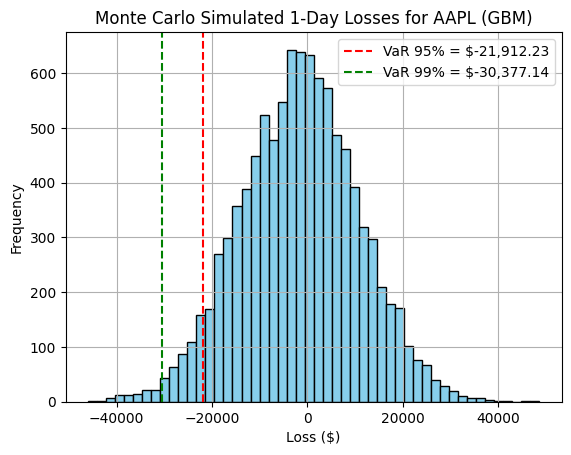

In [169]:
import numpy as np
import matplotlib.pyplot as plt

ticker = 'AAPL'
data2 = yf.download(ticker, start='2023-01-01', end='2024-01-01')
data2.to_csv('aapl.csv')
prices = data2['Close']

log_returns = np.log(prices/prices.shift(1)).dropna()

mu = log_returns.mean().item()
sigma = log_returns.std().item()

# using geometric brownian movement to stimulate price paths
no_of_simulations = 10000
S0 = float(prices.iloc[-1]) # latest price
T = 1 # 1-Day
dt = 1 # size of time step

# generate random shocks Z ~ N(0,1)
Z = np.random.standard_normal(no_of_simulations)

# Simulate endprices using GBM
simulated_prices = S0 * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

initial_investment = 1000000
simulated_portfolio_values = initial_investment * (simulated_prices/S0)
losses = initial_investment - simulated_portfolio_values

VaR_95 = np.percentile(losses, 5)
VaR_99 = np.percentile(losses, 1)

print(f"1-Day 95% Monte Carlo VaR using GBM: ${VaR_95:,.2f}")
print(f"1-Day 99% Monte Carlo VaR using GBM: ${VaR_99:,.2f}")

plt.hist(losses, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=VaR_95, color='red', linestyle='--', label=f"VaR 95% = ${VaR_95:,.2f}")
plt.axvline(x=VaR_99, color='green', linestyle='--', label=f"VaR 99% = ${VaR_99:,.2f}")
plt.title(f"Monte Carlo Simulated 1-Day Losses for {ticker} (GBM)")
plt.xlabel("Loss ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()